## Deliberated Aberration Data
_Data obtained on 05/25/17_

In [114]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.ndimage.interpolation import rotate
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [115]:
predir = '../../data/For_Jason_GPI_PSFs/GPI_data_10_17_2016/'

### <font color="blue">Some notes about data</font>
1. H band - 1.65 $\mu$m
2. 

#### <font color="magenta">Notes:</font>
1. header is useless. No information about rotation or 'scaling'. Even the center of image is unknown

---
### Data - the "Standard" PSF (not aberrated)

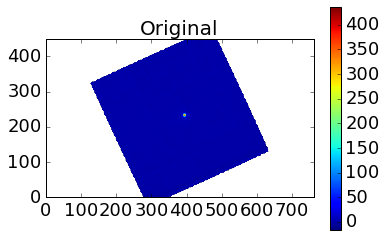

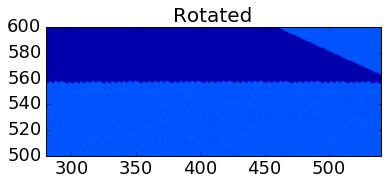

In [183]:
not_aber_path = predir+'image16_minus150.fits'

no_aber = data_manage(path=not_aber_path,angle=24.4,clipsize=0)
no_aber_rot = no_aber.rot_img(xlim=(280,540),ylim=(500,600))

Looks like rotating with 24.4 degrees produces the "best" result (i.e. aligned with axes)

---
### Plus 300 nm defocus

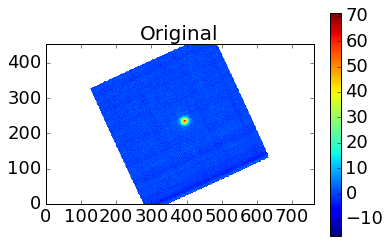

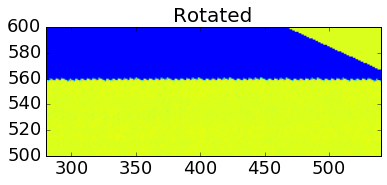

In [78]:
plus_300_path = predir+'image14_plus150.fits'

plus_300 = data_manage(path=plus_300_path,angle=24.4,clipsize=0)
plus_300_rot = plus_300.rot_img(xlim=(280,540),ylim=(500,600))

---
### Plus 100 nm

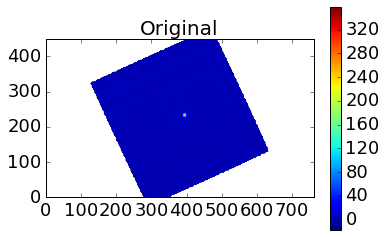

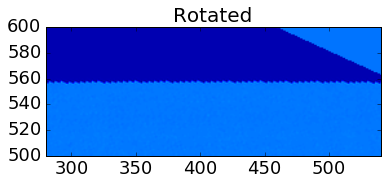

In [116]:
plus_100_path = predir+'image18_minus50.fits'

plus_100 = data_manage(path=plus_100_path,angle=24.4,clipsize=0)
plus_100_rot = plus_100.rot_img(xlim=(280,540),ylim=(500,600))

---
### Ast. 150 nm

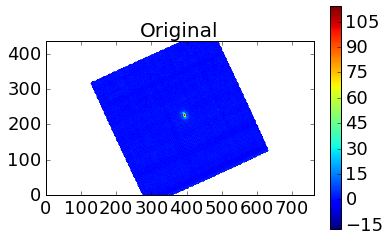

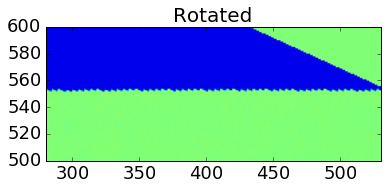

In [80]:
ast_150_path = predir+'image26_astig150.fits'

ast_150 = data_manage(path=ast_150_path,angle=24.4,clipsize=0)
ast_150_rot = ast_150.rot_img(xlim=(280,530),ylim=(500,600))

(336.5, 536.5)

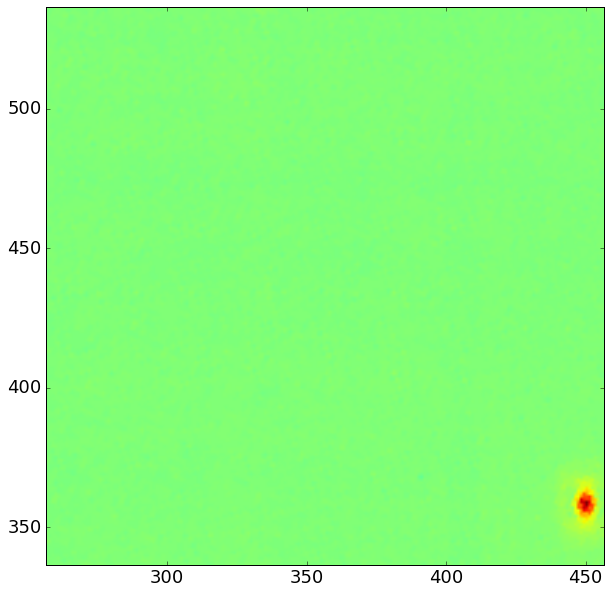

In [86]:
ctx,cty = (ast_150_rot.shape[0]-1)/2.,(ast_150_rot.shape[1]-1)/2.
wd = 100

plt.figure(figsize=(10,10))
plt.imshow(ast_150_rot,origin='lower')
plt.xlim(ctx-wd,ctx+wd); plt.ylim(cty-wd,cty+wd)

Demonstrating that the center has to be found otherwise

---
## <font color="blue">Peak and Center</font>
#### Notes:
1. One potential issue: the interpolation (rotation) has "skewed" the pixels. The reconstruction will certainly be biased.

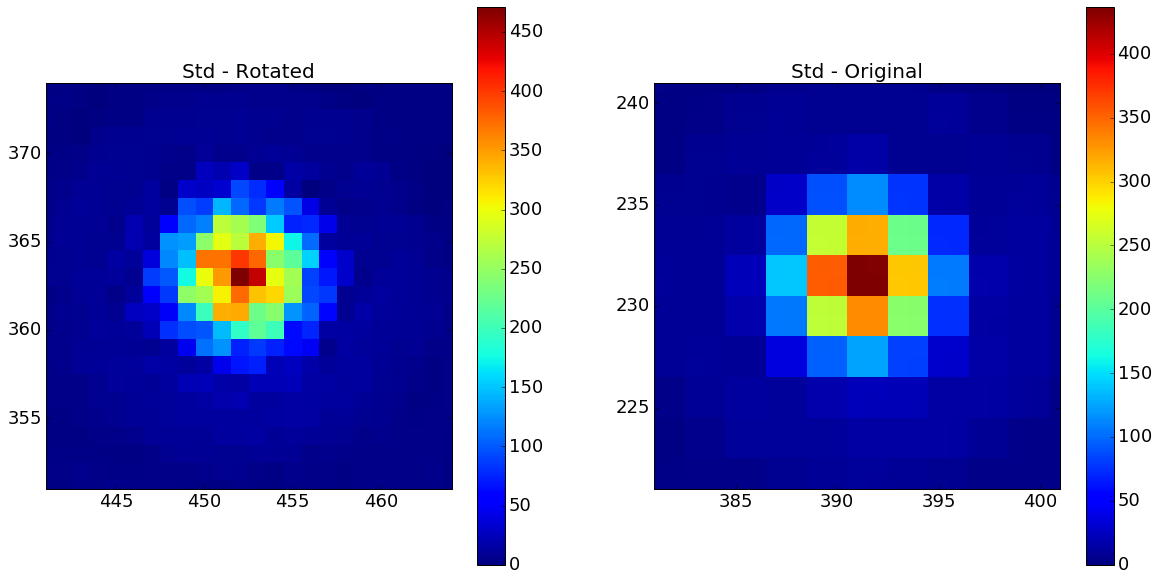

In [160]:
xlim = (441,464)
ylim = (351,374)

xlim2 = (381,401)
ylim2 = (221,241)

##
plt.figure(figsize=(20,10))
plt.subplot(121); plt.title('Std - Rotated')
plt.imshow(no_aber_rot,origin='lower',interpolation='none')
plt.xlim(xlim); plt.ylim(ylim); 
plt.colorbar(); plt.clim(0,np.max(no_aber_rot))

plt.subplot(122); plt.title('Std - Original')
plt.imshow(no_aber.data,origin='lower',interpolation='none')
plt.xlim(xlim2); plt.ylim(ylim2); 
plt.colorbar(); plt.clim(0,np.nanmax(no_aber.data))

FWHM has changed from 3 to 7...<br>

---
## <font color="red">Defining "oversampling" for PR purpose</font>
We know that Airy disk has an FWHM of ~1.2 $\lambda/D$:
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Airy_vs_gaus.svg/502px-Airy_vs_gaus.svg.png'>

Now since (see also the [notebook](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/full_opt.ipynb) for optics simulation) the sampling frequnecy ($f_s$) goes as
$$ f_s = \frac{\lambda}{Df_\text{pix}} $$
where $f_\text{pix}$ is the pixel size in the focal plane, in radians; everything else is in physical unit. The total number of pixels required for such $f_s$ is
$$ N_\text{pix} = D_Nf_s $$
where $D_N$ is the diameter of the aperture itself in pixels. Converting these to the "oversampling" rate ($\equiv O_s$) defined in our PR routines (see the [code](https://github.com/Mipanox/GPI_stuff/blob/master/codes/pr.py)), we have
$$ O_s = \frac{N_\text{pix}}{2D_N} = \frac{\lambda}{2Df_\text{pix}}$$

Finally, if the measured FWHM is across $m$ pixels in the focal plane, and because $mf_\text{pix}=1.2\lambda/D$, then
$$ O_s = \frac{m}{2\times1.2} = \frac{m}{2.4} $$


<br><br><br>
In our cases, for example, the oversampling (from rotated images) to input to PR routines is 7/2.4~2.92

---
## <font color="blue">Masking - clipping the images</font>
Two ways: Circular or square. Intuitively I'd prefer circular as these PSFs contain spatial frequency information from the pupil input.

In [261]:
test=np.copy(no_aber_rot)
outtest,outmask = ctr_mask(test,size=15,center=(452,363))

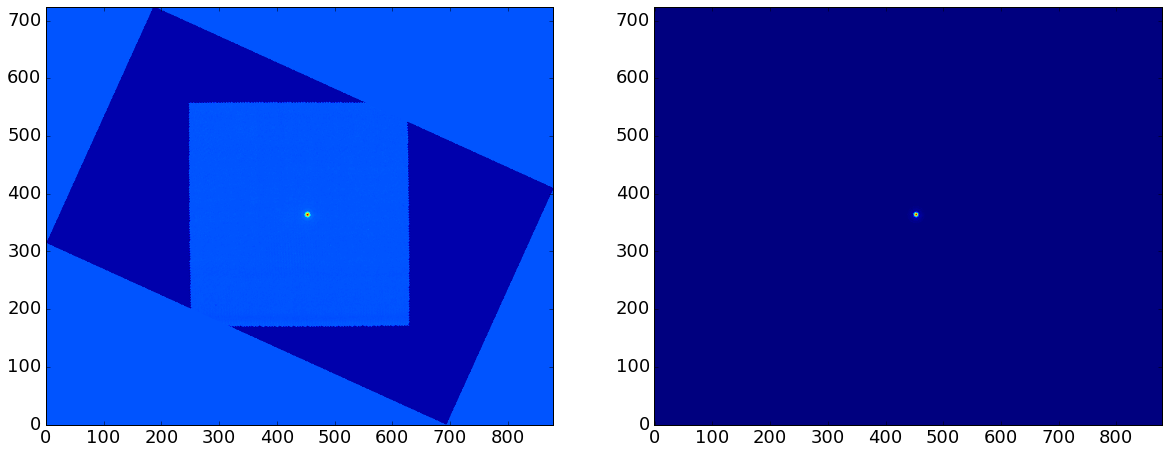

In [236]:
plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(no_aber_rot,origin='lower')
plt.subplot(122); plt.imshow(outtest,origin='lower')

In [264]:
clipped = clipping(test,Npix=128,center=(452,363),size=15)

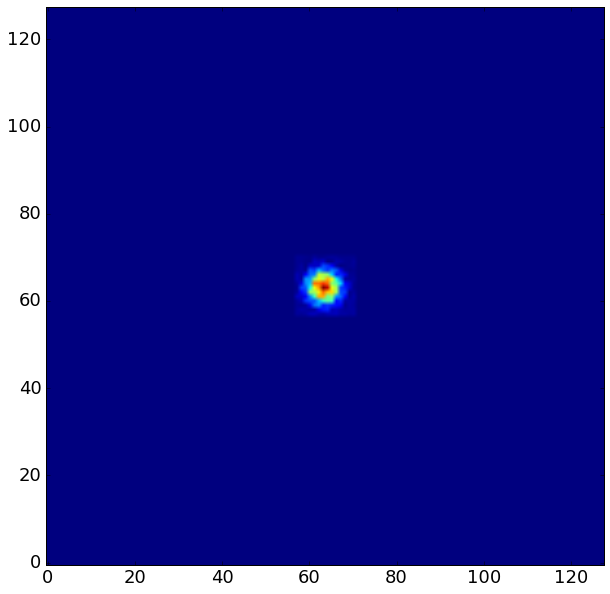

In [265]:
plt.figure(figsize=(10,10))
plt.imshow(clipped,origin='lower')

# <font color="orange">Remaining: from above then apply "overs" and PR! (first assume uniform aperture)</font>

----
#### <font color="magenta">Check 1</font>
Making sure that the "-150nm" one is the closest to "no aberration"

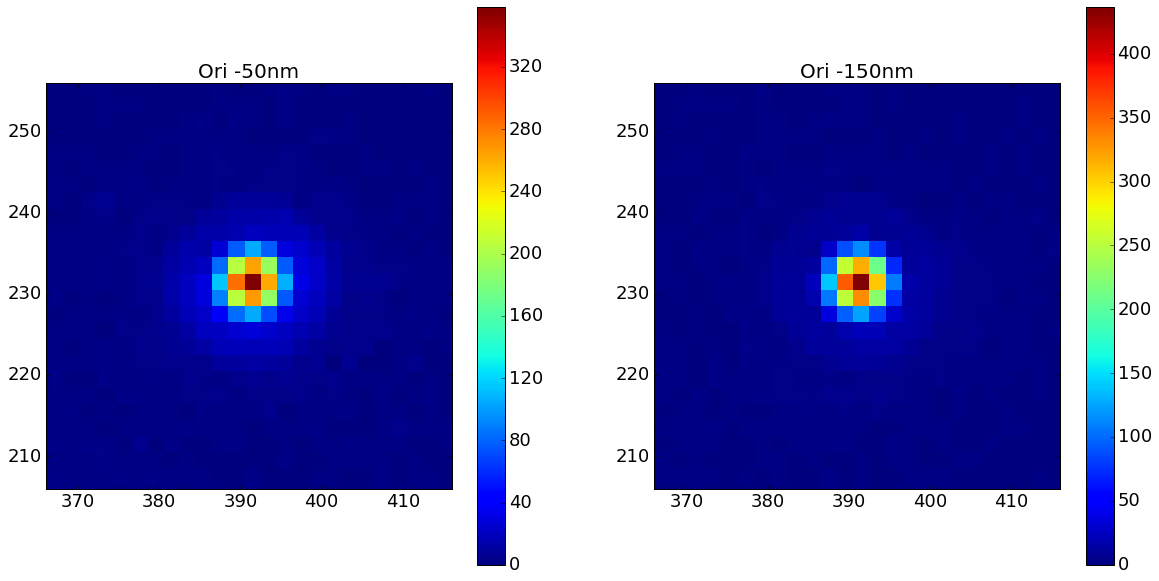

In [122]:
plt.figure(figsize=(20,10))
plt.subplot(121); plt.title('Ori -50nm')
plt.imshow(plus_100.data,origin='lower',interpolation='none')
plt.xlim(366,416); plt.ylim(206,256); 
plt.colorbar(); plt.clim(0,np.nanmax(plus_100.data))

plt.subplot(122); plt.title('Ori -150nm')
plt.imshow(no_aber.data,origin='lower',interpolation='none')
plt.xlim(366,416); plt.ylim(206,256); 
plt.colorbar(); plt.clim(0,np.nanmax(no_aber.data))

---
